# Matemática para Ciencia de los Datos
# Trabajo Práctico 2

Profesor: Luis Alexánder Calvo Valverde 

Instituto Tecnológico de Costa Rica, 

Programa Ciencia de Datos

---

Fecha de entrega: Lunes 8 de Mayo del 2023, a más tardar a las 3:00 pm.

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo jupyter ( .IPYNB ). 

Estudiante(s):
1. **Marco Ferraro**



---

**Pregunta 1**

Considerando que la transpuesta de una matriz es el resultado de cambiar las filas a columnas. Sea una matriz $A\in\mathbb{R}^{m\times n}$, su transpuesta se escribe como $A^{T}\in\mathbb{R}^{n\times m}$ y sus entradas están dadas por: 

\begin{equation}
\left(A^{T}\right)_{i,j}=A_{j,i}.
\end{equation}

Proponga Usted dos matrices, $A\in\mathbb{R}^{4\times 3}$ y $B\in\mathbb{R}^{3\times 4}$ (no las busque en Internet, trate de proponer los valores por si mismo), y utilizando numpy muestre que las siguientes propiedades se cumplen con sus matrices propuestas.

**Note** que ni A ni B son cuadradas, y no tienen las mismas dimensiones.


In [1]:
import numpy as np

A = np.matrix([[6, 8, 9], [4, 1 ,-8], [-12, 8, 9], [-12, 72, 0]])
B = np.matrix([[43, 9, -2, -32], [4, 0, 44, 11], [4, 32, -8, -1]])

print(f"Shape of A: {A.shape}")
print(f"Shape of B: {B.shape}")

Shape of A: (4, 3)
Shape of B: (3, 4)


**1.1 (15 puntos)**

- $\left(A^{T}\right)^{T}=A$


In [2]:
import numpy as np

np.array_equal(A.T.T, A)

True

**1.2 (15 puntos)**

- $\left(AB\right)^{T}=B^{T}A^{T}$


In [3]:
np.array_equal(np.matmul(A, B).T, np.matmul(B.T, A.T))

True

**1.3 (15 puntos)**

Para este ejercicio, **proponga dos matrices de igual dimensionalidad**


- $\left(A+B\right)^{T}=A^{T}+B^{T}$.


In [4]:
A = np.matrix([[6, 8, 9], [4, 1 ,-8], [-12, 8, 9]])
B = np.matrix([[43, 9, -32], [4, 0, 11], [32, -8, -1]])

np.array_equal((A + B).T, (A.T + B.T))

True

---

**Pregunta 2**


Un conjunto de vectores $\left\{ \vec{x}_{1},\vec{x}_{2},\ldots,\vec{x}_{n}\right\} \in\mathbb{R}^{m}$ se dice que es linealmente independiente, si ningún vector de tal conjunto puede ser representado como una combinación lineal del resto de vectores. De lo contrario, si uno de los vectores en tal conjunto puede ser representado como una combinación lineal del resto de vectores, entonces los vectores son linealmente dependientes, lo que se expresa como: 

\begin{equation}
\vec{x}_{j}=\sum_{i=1}^{n-1}\alpha_{i}\vec{x}_{i}
\end{equation}

para cualquier conjunto de valores escalares $\alpha_{1},\ldots,\alpha_{n-1}\in\mathbb{R}$ se dice que el vector $\vec{x}_{j}\in\mathbb{R}^{m}$ es linealmente dependiente de los vectores $\vec{x}_{i}$. 


**2.1 (15 puntos)**

Proponga una matriz $A\in\mathbb{R}^{4\times 3}$, cuyos vectores columnas sean linealmente independientes, calcule su rango para mostrar que es de rango $3$ (puede utilizar matrix_rank).


In [5]:
from numpy.linalg import matrix_rank

A = np.matrix([[1, 3, 4], [-8, 1 ,0], [-12, 8, 9], [7, 13, -7]])

matrix_rank(A)

3

**2.2 (15 puntos)**

Ahora haga los cambios necesarios a su matriz de manera que pase a rango $2$. 

In [6]:
A = np.matrix([[1, 3, 4], [-8, -24 ,0], [-12, -36, 9], [7, 21, -7]])

matrix_rank(A)

2

---

**Pregunta 3 (25 puntos)**

Utilizando el archivo "Dataset_usar.csv", haga:
- Cargue el archivo.
- Utilizando el modelo $Ax=b$
    - Conforme la matriz $A$ con las primeras 8 columnas.
    - Conforme el vector $b$ con la última columna de la derecha.
    - Calcule el vector de pesos ($x$), del tipo $A^{-1}b=x$
    - Calcule un b_estimado con $A$ e $x$
    - Calcule la norma 2 de la diferencia entre b y b_estimado.
    - Grafique b y b_estimado.



In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_vectors(a, b, x_lim=30, y_lim=30, label_a='vector a', label_b='vector b'):
  # Create a plot
  plt.figure()

  # Plot the vectors as arrows
  plt.arrow(0, 0, a[0], a[1], head_width=0.05, head_length=0.05, color='b', label=label_a)
  plt.arrow(0, 0, b[0], b[1], head_width=0.05, head_length=0.05, color='r', label=label_b)

   

  # Set the x and y limits of the plot
  plt.xlim(-1 * x_lim, x_lim)
  plt.ylim(-1 * y_lim, y_lim)

  # Add a grid and legend
  plt.grid()
  plt.legend()

  # Show the plot
  plt.show()

In [8]:
import pandas as pd

df = pd.read_csv("Dataset_usar.csv", sep=';')

df.head()

,bias,Length,Diameter,Height,Whole,Shucked,Sex_Female,Sex_Masculine,Shellweight
0,1,0.186567,0.155963,0.195652,0.011688,0.333333,0,1,0.010
1,1,0.813433,0.761468,0.826087,0.433327,0.333333,1,0,0.435
2,1,0.410448,0.376147,0.369565,0.074022,0.333333,1,0,0.068
3,1,0.537313,0.504587,0.500000,0.143085,0.333333,1,0,0.096
4,1,0.507463,0.495413,0.565217,0.146981,0.333333,0,1,0.144


In [9]:
LAST_INDEX = 8

df_numpy = df.to_numpy()
A = []
B = []
for row in df_numpy:
     A.append(row[0:LAST_INDEX])
     B.append(row[LAST_INDEX])

A = np.array(A)
A.shape

(998, 8)

In [10]:
from numpy.linalg import pinv
X = np.matmul(pinv(A), B)
X.shape

(8,)

In [11]:
B_predict = np.matmul(A, X)
B_predict.shape

(998,)

In [12]:
from numpy import linalg as LA

LA.norm(B -B_predict)

1.2226105247660057

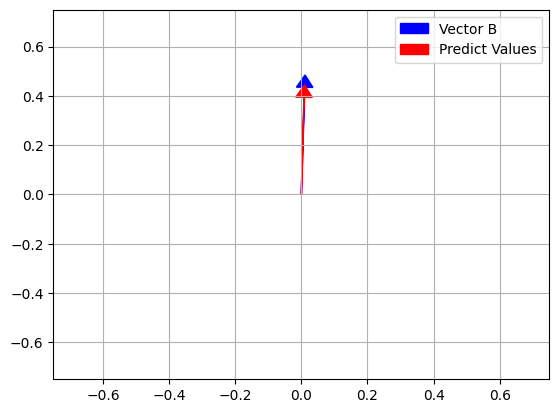

In [13]:
plot_vectors(B, B_predict, x_lim=0.75, y_lim=0.75, label_a='Vector B', label_b='Predict Values')